In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 음식점 정보 불러오기
path = '/content/drive/MyDrive/my_pjt(주간)'
%cd /content/drive/MyDrive/my_pjt(주간)
raw = pd.read_csv('./음식_goodpoint.csv', index_col=0)
food_review = raw.copy()

/content/drive/MyDrive/my_pjt(주간)


In [ ]:
# Good_Point 단어 별, 띄어쓰기를 기준으로 분리하기
review_split = food_review['Good_Point'].str.split(expand=True)
# expand=True : 문자열을 분할할 때 결과를 여러 열로 확장하여 데이터 프레임 형태로 반환

review_split

,0,1,2,3
803,뷰가,좋아요,None,None
804,집중하기,좋아요,None,None
805,읽을만한,책이,많아요,None
806,인테리어가,멋져요,None,None
807,커피가,맛있어요,None,None
...,...,...,...,...
17442,아늑해요,None,None,None
17443,메뉴,구성이,알차요,None
17444,건강한,맛이에요,None,None
17445,음료가,맛있어요,None,None


In [ ]:
# 음식점 정보 데이터와 Good_Point 토큰화한 데이터 합치기
split_food_raw = pd.concat([food_review,review_split],axis = 1)

# copy본 생성
split_food = split_food_raw.copy()

split_food[:2]

,Attraction,Good_Point,Selected_People,0,1,2,3
803,채그로,뷰가 좋아요,146,뷰가,좋아요,None,None
804,채그로,집중하기 좋아요,62,집중하기,좋아요,None,None


In [ ]:
# 추출한 단어를 axis = 0 기준으로 나열하기
word = pd.concat([split_food.iloc[:,3],split_food.iloc[:,4],split_food.iloc[:,5],split_food.iloc[:,6]],axis = 0)

# 중복된 값 추출
unique_words = word.unique()

# 중복된 값을 데이터 프레임으로 변환
unique_words = pd.DataFrame(unique_words, columns=['unique_word'])

# counts 컬럼 추가
unique_words['counts'] = 0
unique_words

,unique_word,counts
0,뷰가,0
1,집중하기,0
2,읽을만한,0
3,인테리어가,0
4,커피가,0
...,...,...
124,가치있어요,0
125,되어있어요,0
126,돼요,0
127,곳이,0


In [ ]:
# split_food : 리뷰를 띄어쓰기 단위로 분리하고 리뷰를 선택한 사람의 수를 담고 있는 데이터 프레임
# unique_words 중복된 단어만을 담은 데이터 프레임에서 얻은 단어가 split_food에 있다면,
# 그 리뷰를 선택한 사람의 수를 더해가며 count를 해줌

count = []

for word in unique_words['unique_word']:
    sum = 0
    for i in range(3,7):
        for j in range(len(split_food)):
            if split_food.iloc[j,i] == word:
                sum = sum + split_food.iloc[j,2]
    count.append(sum)

unique_words['counts'] = count


In [ ]:
# 'counts' 열을 기준으로 내림차순 정렬
unique_words_sorted= unique_words.sort_values(by=['counts'], ascending=False)
unique_words_sorted

,unique_word,counts
84,None,2152782
81,맛있어요,378758
19,음식이,302654
78,좋아요,188217
14,특별한,109764
...,...,...
111,풍부해요,2
117,프로그램이,2
73,체험,2
119,훌륭해요,1


In [ ]:
unique_words_sorted.to_csv('음식_토큰_전체.csv')


In [ ]:
raw = pd.read_csv('./음식_토큰_전체.csv', index_col=0)
review_total = raw.copy()[1:]
review_total

,unique_word,counts
81,맛있어요,378758
19,음식이,302654
78,좋아요,188217
14,특별한,109764
17,매장이,107029
...,...,...
111,풍부해요,2
117,프로그램이,2
73,체험,2
119,훌륭해요,1


In [ ]:
# 워드클라우드 그리기 위한 라이브러리 설치
!pip install wordcloud matplotlib pillow

워드 클라우드 그리기

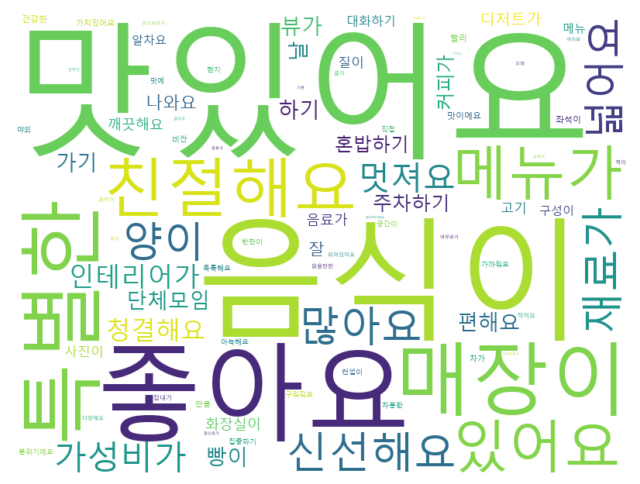

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

raw = pd.read_csv('./음식_토큰_전체.csv', index_col=0)[1:]
review_total = raw.copy()

# 'counts' 열의 데이터 형식을 정수형으로 변환
review_total['counts'] = review_total['counts'].astype(int)

# unique_word와 counts를 딕셔너리로 변환
wc = dict(zip(review_total['unique_word'].astype('str'), review_total['counts'].astype('int')))

# 워드 클라우드 생성
wordcloud = WordCloud(
    font_path='./malgun.ttf',
    width=800,
    height=600,
    #max_font_size=100,
    background_color='white'
)

wordcloud.generate_from_frequencies(wc)  # generate_from_frequencies() 함수 사용

# 워드 클라우드 시각화
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

논문과 워드클라우드와 단어의 빈도수를 확인한 후,
음식점을 선택하는 9가지의 요인으로 나눔
- 시설 및 환경
- 음식의 맛과 질
- 청결도와 위생
- 서비스
- 가격과 가치
- 분위기
- 접근성
- 특별한 목적


In [ ]:
# 구석구석 정보 불러오기
info_tag_raw = pd.read_csv('./Category_Gusuk_Review.csv',encoding='cp949')
info_tag = info_tag_raw.copy()
info_tag = info_tag[['Attraction', 'Category', 'Participants']]

# 네이버 정보 불러오기
review_raw = pd.read_csv('./Naver_Final.csv',encoding='cp949')
review = review_raw .copy()

# info_tag와 review 데이터 프레임 합치기
all_category_info = pd.merge(info_tag, review, on='Attraction')
all_category_info[:2]

,Attraction,Category,Participants,Good_Point,Selected_People
0,동대문역사문화공원,관광,56,뷰가 좋아요,22
1,동대문역사문화공원,관광,56,관리가 잘 되어있어요,21


In [ ]:
# 음식 카테고리만 가져오기
food_info = all_category_info[all_category_info['Category'] == '음식']
food_info[:5]

,Attraction,Category,Participants,Good_Point,Selected_People
803,채그로,음식,201,뷰가 좋아요,146
804,채그로,음식,201,집중하기 좋아요,62
805,채그로,음식,201,읽을만한 책이 많아요,61
806,채그로,음식,201,인테리어가 멋져요,60
807,채그로,음식,201,커피가 맛있어요,39


In [ ]:
categories = {
    "시설 및 환경": ["뷰가 좋아요", "인테리어가 멋져요", "사진이 잘 나와요", "경관이 독특해요",
                    "좌석이 편해요", "매장이 넓어요", "룸이 잘 되어있어요", "야외 공간이 멋져요",
                    "산책로가 잘 되어있어요", "피크닉하기 좋아요", "편의시설이 잘 되어있어요", "공간이 넓어요",
                    "붐비지 않아요", "방문객이 많아요"],

    "음식의 맛과 질": ["커피가 맛있어요", "음료가 맛있어요", "디저트가 맛있어요", "차가 맛있어요",
                      "재료가 신선해요", "건강한 맛이에요", "신선해요", "원산지 표시가 명확해요",
                      "음식이 맛있어요", "양이 많아요", "고기 질이 좋아요", "잡내가 적어요", "빵이 맛있어요", "기본 안주가 좋아요"],

    "청결도와 위생":  ["화장실이 깨끗해요", "매장이 청결해요", "환기가 잘 돼요", "관리가 잘 되어있어요"],

    "서비스" : ["친절해요", "음식이 빨리 나와요", "포장이 깔끔해요", "직접 잘 구워줘요", "주문제작을 잘해줘요", "안전하게 관리해요"],

    "가격과 가치": ["가성비가 좋아요", "코스요리가 알차요", "세트 구성이 알차요", "비싼 만큼 가치있어요", "가격이 합리적이에요"],

    "음식의 다양성": ["특별한 메뉴가 있어요", "메뉴 구성이 알차요", "반찬이 잘 나와요", "술이 다양해요",
                     "코스가 길어요", "먹거리가 풍부해요", "샐러드바가 잘 되어있어요", "부위가 다양해요", "종류가 다양해요"],

    "분위기": ["특별한 날 가기 좋아요", "컨셉이 독특해요", "테마가 재미있어요", "아늑해요",
              "차분한 분위기에요", "오래 머무르기 좋아요", "조용히 쉬기 좋아요", "혼밥하기 좋아요", "혼술하기 좋아요",
              "파티하기 좋아요", "라이브공연이 훌륭해요", "음악이 좋아요", "대화하기 좋아요", "집중하기 좋아요"],

    "접근성": ["대중교통이 편해요", "근처에 갈 곳이 많아요", "주차하기 편해요", ],

    "특별한 목적": ["단체모임 하기 좋아요", "아이와 가기 좋아요", "부모도 쉬기 좋아요", "읽을만한 책이 많아요",
                   "향신료가 강하지 않아요","현지 맛에 가까워요", "볼거리가 많아요", "반려동물과 가기 좋아요", "선물하기 좋아요",
                   "비주얼이 좋아요", "놀거리가 많아요", "체험 프로그램이 많아요"]

}

# 카테고리 데이터프레임 생성
food_categories = pd.DataFrame.from_dict(categories, orient='index').transpose()

# 결과 출력
food_categories[:1]

,시설 및 환경,음식의 맛과 질,청결도와 위생,서비스,가격과 가치,음식의 다양성,분위기,접근성,특별한 목적
0,뷰가 좋아요,커피가 맛있어요,화장실이 깨끗해요,친절해요,가성비가 좋아요,특별한 메뉴가 있어요,특별한 날 가기 좋아요,대중교통이 편해요,단체모임 하기 좋아요


In [ ]:
food_info[:1]

,Attraction,Category,Participants,Good_Point,Selected_People
803,채그로,음식,201,뷰가 좋아요,146


In [ ]:
# Good_Point_categories 컬럼 초기화
Good_Point_categories = []

# 각 Good_Point가 데이터프레임에 있는지 확인하고, 있다면 카테고리를 Good_Point_categories 리스트에 저장
for Good_Point in food_info['Good_Point']:
    categories_found = []
    for category in food_categories.columns:
        if Good_Point in food_categories[category].values:
            categories_found.append(category)
    Good_Point_categories.append(', '.join(categories_found))

# 새로운 열로 추가
food_info['Good_Point_categories'] = Good_Point_categories

food_info = food_info[['Attraction','Good_Point_categories','Good_Point','Selected_People','Participants']]
food_info[:3]

<ipython-input-13-69303a06b4b6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_info['Good_Point_categories'] = Good_Point_categories


,Attraction,Good_Point_categories,Good_Point,Selected_People,Participants
803,채그로,시설 및 환경,뷰가 좋아요,146,201
804,채그로,분위기,집중하기 좋아요,62,201
805,채그로,특별한 목적,읽을만한 책이 많아요,61,201


In [ ]:
food_info.to_csv('food_Good_Point_categories.csv')

In [ ]:
# 하나의 음식점에서 같은 리뷰 속성을 가질 때 리뷰 선택한 사람의 수를 합함
food_review_category_info = food_info.groupby(['Attraction','Good_Point_categories','Participants'])['Selected_People'].sum().reset_index()
food_review_category_info

,Attraction,Good_Point_categories,Participants,Selected_People
0,1940금문,가격과 가치,122,6
1,1940금문,분위기,122,30
2,1940금문,서비스,122,43
3,1940금문,시설 및 환경,122,17
4,1940금문,음식의 다양성,122,40
...,...,...,...,...
4086,히라메키,음식의 다양성,123,18
4087,히라메키,음식의 맛과 질,123,161
4088,히라메키,접근성,123,1
4089,히라메키,청결도와 위생,123,30


In [ ]:
food_review_category_info.to_csv('음식_각_속성_선택_인원_합.csv')

띄어쓰기 기준으로 리뷰 토큰화한 후 분류

In [ ]:
token_categories = {
    "시설 및 환경": ["뷰가", "인테리어가", "사진이", "경관이",
                    "좌석이", "넓어요", "룸이", "야외",
                    "산책로가", "피크닉하기", "편의시설이",
                    "붐비지", "방문객이"],

    "음식의 맛과 질": ["맛있어요","신선해요", "건강한", "원산지",
                      "양이", "질이", "잡내가", "안주가"],

    "청결도와 위생":  ["깨끗해요", "청결해요", "환기가", "관리가"],

    "서비스" : ["친절해요", "빨리", "포장이", "구워줘요", "주문제작을", "안전하게"],

    "가격과 가치": ["가성비가", "알차요", "가치있어요", "합리적이에요"],

    "음식의 다양성": ["메뉴가", "구성이", "반찬이", "다양해요",
                     "코스가", "풍부해요", "샐러드바가"],

    "분위기": ["특별한", "컨셉이", "테마가", "아늑해요",
              "분위기에요", "머무르기", "조용히", "혼밥하기", "혼술하기",
              "파티하기", "라이브공연이", "음악이", "대화하기", "집중하기"],

    "접근성": ["대중교통이", "근처에", "주차하기", ],

    "특별한 목적": ["단체모임", "아이와", "부모도", "책이",
                   "향신료가","현지", "볼거리가", "반려동물과", "선물하기",
                   "비주얼이", "놀거리가", "체험"]

}
# 카테고리 데이터프레임 생성
token_categories = pd.DataFrame.from_dict(token_categories, orient='index').transpose()

# 결과 출력
token_categories[:1]

,시설 및 환경,음식의 맛과 질,청결도와 위생,서비스,가격과 가치,음식의 다양성,분위기,접근성,특별한 목적
0,뷰가,맛있어요,깨끗해요,친절해요,가성비가,메뉴가,특별한,대중교통이,단체모임


In [ ]:
raw = pd.read_csv('./음식_토큰_전체.csv', index_col=0)
review_total = raw.copy()
review_total

,unique_word,counts
84,NaN,2152782
81,맛있어요,378758
19,음식이,302654
78,좋아요,188217
14,특별한,109764
...,...,...
111,풍부해요,2
117,프로그램이,2
73,체험,2
119,훌륭해요,1


In [ ]:
token = review_total[['unique_word']]
token[:2]

,unique_word
84,NaN
81,맛있어요


In [ ]:

# Good_Point_categories 컬럼 초기화
token_category = []

# 각 Good_Point가 데이터프레임에 있는지 확인하고, 있다면 카테고리를 Good_Point_categories 리스트에 저장
for unique_word in token['unique_word']:
    categories_found = []
    for category in token_categories.columns:
        if unique_word in token_categories[category].values:
            categories_found.append(category)
    token_category.append(', '.join(categories_found))

# 새로운 열로 추가
token['token_categories'] = token_category

token

,unique_word,token_categories
84,NaN,
81,맛있어요,음식의 맛과 질
19,음식이,
78,좋아요,
14,특별한,분위기
...,...,...
111,풍부해요,음식의 다양성
117,프로그램이,
73,체험,특별한 목적
119,훌륭해요,


In [ ]:
# token_categorys열에서 문자열의 앞뒤 공백을 제거하고,
# 빈 문자열이 아닌 행만 선택함.

token = token[token['token_categories'].str.strip() !='']
token

,unique_word,token_categories
81,맛있어요,음식의 맛과 질
14,특별한,분위기
9,친절해요,서비스
86,메뉴가,음식의 다양성
74,신선해요,음식의 맛과 질
...,...,...
53,관리가,청결도와 위생
55,편의시설이,시설 및 환경
111,풍부해요,음식의 다양성
73,체험,특별한 목적


In [ ]:
token.to_csv('token_category.csv')

In [ ]:
split_food

,Attraction,Good_Point,Selected_People,0,1,2,3
803,채그로,뷰가 좋아요,146,뷰가,좋아요,None,None
804,채그로,집중하기 좋아요,62,집중하기,좋아요,None,None
805,채그로,읽을만한 책이 많아요,61,읽을만한,책이,많아요,None
806,채그로,인테리어가 멋져요,60,인테리어가,멋져요,None,None
807,채그로,커피가 맛있어요,39,커피가,맛있어요,None,None
...,...,...,...,...,...,...,...
17442,h450,아늑해요,2,아늑해요,None,None,None
17443,h450,메뉴 구성이 알차요,2,메뉴,구성이,알차요,None
17444,h450,건강한 맛이에요,2,건강한,맛이에요,None,None
17445,h450,음료가 맛있어요,1,음료가,맛있어요,None,None


In [ ]:
Good_Point_categories = []
for i in range(len(split_food)):
    categories_found = []
    for word in split_food.iloc[i, 3:7]:
        if word in token['unique_word'].values:
            category = token.loc[token['unique_word'] == word, 'token_categories'].values[0]
            categories_found.append(category)
    Good_Point_categories.append(', '.join(categories_found))

# 새로운 열로 추가
split_food['predict_categories'] = Good_Point_categories

In [ ]:
split_food

,Attraction,Good_Point,Selected_People,0,1,2,3,predict_categories
803,채그로,뷰가 좋아요,146,뷰가,좋아요,None,None,시설 및 환경
804,채그로,집중하기 좋아요,62,집중하기,좋아요,None,None,분위기
805,채그로,읽을만한 책이 많아요,61,읽을만한,책이,많아요,None,특별한 목적
806,채그로,인테리어가 멋져요,60,인테리어가,멋져요,None,None,시설 및 환경
807,채그로,커피가 맛있어요,39,커피가,맛있어요,None,None,음식의 맛과 질
...,...,...,...,...,...,...,...,...
17442,h450,아늑해요,2,아늑해요,None,None,None,분위기
17443,h450,메뉴 구성이 알차요,2,메뉴,구성이,알차요,None,"음식의 다양성, 가격과 가치"
17444,h450,건강한 맛이에요,2,건강한,맛이에요,None,None,음식의 맛과 질
17445,h450,음료가 맛있어요,1,음료가,맛있어요,None,None,음식의 맛과 질


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
 [[ 824    0    0    0    0    0    1    0    0    0    0]
 [   0 2002    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0  890    0    0    0    0    0    0    0]
 [   0    0    0    0 1744    0    0    0    0    0    0]
 [   0    0  452    0    0  305  314    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 2259    0    0    0]
 [   0    0    0    0    0    0    0    0  420    0    0]
 [   0    0    0    0    0    0    0    0    0  932    0]
 [   0    0    0    0    0    0    0    0    0    0  717]]
Classification Report:
                  precision    recall  f1-score   support

         가격과 가치       1.00      1.00      1.00       825
            분위기       1.00      1.00      1.00      2002
   분위기, 음식의 다양성       0.00      0.00      0.00         0
            서비스       1.00      1.00      1.00       890
        시설 및 환경       1.00      

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/se

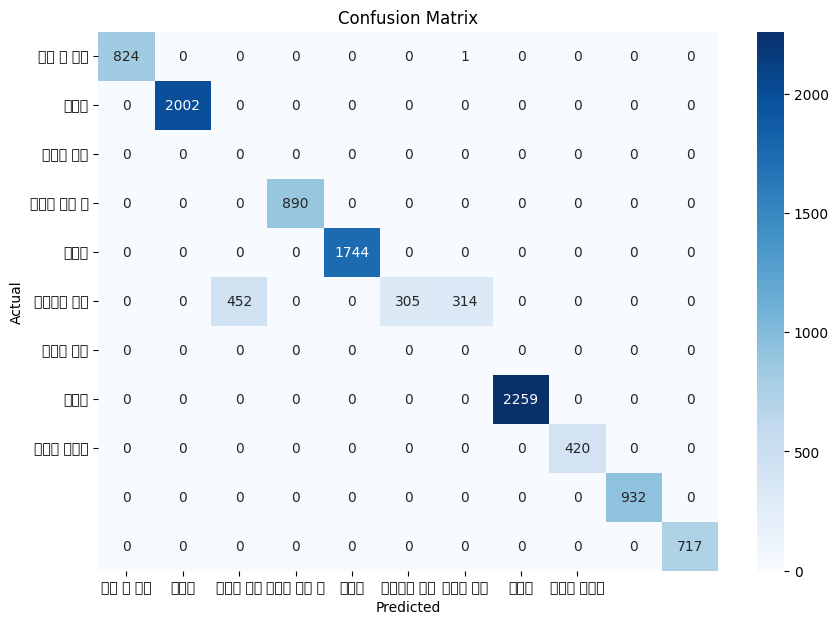

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 데이터 병합
merge = food_info.merge(split_food, on=['Attraction', 'Good_Point'])

# 혼동 행렬 및 분류 보고서 생성
cm = confusion_matrix(merge['Good_Point_categories'], merge['predict_categories'])
cr = classification_report(merge['Good_Point_categories'], merge['predict_categories'])
accuracy = accuracy_score(merge['Good_Point_categories'], merge['predict_categories'])

# 혼동행렬 출력
print('Confusion Matrix:\n', cm)

# 분류보고서 출력 -> 정확도, 정밀도, 재현율, F1 점수 등을 계산
print('Classification Report:\n', cr)

# 전체 정확도 출력
print('Accuracy:', accuracy)

# 폰트 패스 설정
font_path = './malgun.ttf'  # 이 경로가 맞는지 확인
font = fm.FontProperties(fname=font_path, size = 9)

# 전역 폰트 설정
#plt.rcParams['font.family'] = fontprop.get_name()

# 혼동 행렬 시각화
plt.rc('font', family = 'NanumBarunGothic')
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=merge['Good_Point_categories'].unique(),
            yticklabels=merge['Good_Point_categories'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
  merge

,Attraction,Good_Point_categories,Good_Point,Selected_People_x,Participants,Selected_People_y,0,1,2,3,predict_categories
0,채그로,시설 및 환경,뷰가 좋아요,146,201,146,뷰가,좋아요,None,None,시설 및 환경
1,채그로,분위기,집중하기 좋아요,62,201,62,집중하기,좋아요,None,None,분위기
2,채그로,특별한 목적,읽을만한 책이 많아요,61,201,61,읽을만한,책이,많아요,None,특별한 목적
3,채그로,시설 및 환경,인테리어가 멋져요,60,201,60,인테리어가,멋져요,None,None,시설 및 환경
4,채그로,음식의 맛과 질,커피가 맛있어요,39,201,39,커피가,맛있어요,None,None,음식의 맛과 질
...,...,...,...,...,...,...,...,...,...,...,...
10855,h450,분위기,아늑해요,2,260,2,아늑해요,None,None,None,분위기
10856,h450,음식의 다양성,메뉴 구성이 알차요,2,260,2,메뉴,구성이,알차요,None,"음식의 다양성, 가격과 가치"
10857,h450,음식의 맛과 질,건강한 맛이에요,2,260,2,건강한,맛이에요,None,None,음식의 맛과 질
10858,h450,음식의 맛과 질,음료가 맛있어요,1,260,1,음료가,맛있어요,None,None,음식의 맛과 질


In [ ]:
# 각 리뷰에 나온 단어 Count
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
countvect = vect.fit_transform(food_info['Good_Point'])
countvect_df = pd.DataFrame(countvect.toarray(), columns = sorted(vect.vocabulary_))
countvect_df.index = food_info['Attraction']

In [ ]:
# TF-IDF 계산
from sklearn.feature_extraction.text import TfidfVectorizer
tfidv = TfidfVectorizer(use_idf=True, smooth_idf=False, norm=None).fit(food_info['Good_Point'])
tfidv_df = pd.DataFrame(tfidv.transform(food_info['Good_Point']).toarray(), columns = sorted(tfidv.vocabulary_))

In [ ]:
# 문서 유사도 계산
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(tfidv_df, tfidv_df)

array([[1.        , 0.16904531, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.16904531, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
!pip install konlpy
!pip install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 34.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.7/581.7 kB 8.2 MB/s eta 0:00:00
  Created wheel for mecab-python: filename=mecab_python-1.0.0-py3-none-any.whl size=1232 sha256=5aa8ca7d7bce779c97743f02129fd4c711865d8e6436befd7806c8ed369e4983
  Stored in directory: /root/.cache/pip/wheels/ec/41/c8/ce8fb469be2547ce596c4000613806505dc54c296aae45da71
Successfully built mecab-python
Install mecab-ko
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  2424k      0 --:--:-- --:--:-- --:--:-- 2424k
mecab-0.996-ko-0.9.2/
mecab-0.996-ko-0.9.2/example/
mecab-0.996-ko-0.9.2/example

In [ ]:
food_info[:3]

,Attraction,Good_Point_categories,Good_Point,Selected_People,Participants
803,채그로,시설 및 환경,뷰가 좋아요,146,201
804,채그로,분위기,집중하기 좋아요,62,201
805,채그로,특별한 목적,읽을만한 책이 많아요,61,201


In [ ]:
import json
import re
from konlpy.tag import Okt
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [ ]:
# 최종적으로 결합된 메시지를 저장할 빈 문자열
message =""
# 이미 처리된 메시지를 추적하기 위한 빈 집합.
seen_messages = set() # 중복 메시지 추적하기 위한 집합

for review in food_info['Good_Point']:
#   print(item)
    #if 'message' in item:
        new_message = re.sub(r'[^\w]',' ', review)
        # Python의 re 모듈에서 제공하는 sub 함수는 문자열에서 패턴에 일치하는 부분을 다른 문자열로 대체
        # item['message']의 모든 비단어 문자를 공백으로 대체. 여기서 비단어 문자는 알파벳, 숫자, 밑줄(_)을 제외한 모든 문자
        # [^]: 대괄호 안의 ^는 부정을 의미합니다. 즉, 대괄호 안의 내용과 일치하지 않는 문자를 찾습니다.
        # \w: 단어 문자를 의미합니다. 이는 알파벳 대소문자(a-z, A-Z), 숫자(0-9), 밑줄(_)을 포함합니다.
        # 종합하면, r'[^\w]'는 "단어 문자가 아닌 모든 문자"를 찾는 정규 표현식입니다.

        if new_message not in seen_messages:
            seen_messages.add(new_message)

            # message 문자열에 new_message 추가
            message += new_message
            # print(new_message)
            # print(message)


print(message)


뷰가 좋아요집중하기 좋아요읽을만한 책이 많아요인테리어가 멋져요커피가 맛있어요좌석이 편해요사진이 잘 나와요대화하기 좋아요음료가 맛있어요친절해요화장실이 깨끗해요디저트가 맛있어요가성비가 좋아요주차하기 편해요특별한 메뉴가 있어요아늑해요차분한 분위기에요매장이 넓어요매장이 청결해요건강한 맛이에요음식이 맛있어요재료가 신선해요특별한 날 가기 좋아요단체모임 하기 좋아요양이 많아요메뉴 구성이 알차요야외 공간이 멋져요혼밥하기 좋아요반찬이 잘 나와요컨셉이 독특해요코스요리가 알차요음식이 빨리 나와요직접 잘 구워줘요고기 질이 좋아요잡내가 적어요현지 맛에 가까워요아이와 가기 좋아요포장이 깔끔해요술이 다양해요혼술하기 좋아요비싼 만큼 가치있어요향신료가 강하지 않아요음악이 좋아요오래 머무르기 좋아요룸이 잘 되어있어요종류가 다양해요환기가 잘 돼요대중교통이 편해요산책로가 잘 되어있어요경관이 독특해요볼거리가 많아요근처에 갈 곳이 많아요붐비지 않아요방문객이 많아요피크닉하기 좋아요코스가 길어요관리가 잘 되어있어요조용히 쉬기 좋아요편의시설이 잘 되어있어요먹거리가 풍부해요반려동물과 가기 좋아요샐러드바가 잘 되어있어요빵이 맛있어요선물하기 좋아요기본 안주가 좋아요차가 맛있어요세트 구성이 알차요가격이 합리적이에요비주얼이 좋아요파티하기 좋아요주문제작을 잘해줘요안전하게 관리해요놀거리가 많아요테마가 재미있어요부모도 쉬기 좋아요공간이 넓어요체험 프로그램이 많아요신선해요원산지 표시가 명확해요부위가 다양해요라이브공연이 훌륭해요


In [ ]:
message

'뷰가 좋아요집중하기 좋아요읽을만한 책이 많아요인테리어가 멋져요커피가 맛있어요좌석이 편해요사진이 잘 나와요대화하기 좋아요음료가 맛있어요친절해요화장실이 깨끗해요디저트가 맛있어요가성비가 좋아요주차하기 편해요특별한 메뉴가 있어요아늑해요차분한 분위기에요매장이 넓어요매장이 청결해요건강한 맛이에요음식이 맛있어요재료가 신선해요특별한 날 가기 좋아요단체모임 하기 좋아요양이 많아요메뉴 구성이 알차요야외 공간이 멋져요혼밥하기 좋아요반찬이 잘 나와요컨셉이 독특해요코스요리가 알차요음식이 빨리 나와요직접 잘 구워줘요고기 질이 좋아요잡내가 적어요현지 맛에 가까워요아이와 가기 좋아요포장이 깔끔해요술이 다양해요혼술하기 좋아요비싼 만큼 가치있어요향신료가 강하지 않아요음악이 좋아요오래 머무르기 좋아요룸이 잘 되어있어요종류가 다양해요환기가 잘 돼요대중교통이 편해요산책로가 잘 되어있어요경관이 독특해요볼거리가 많아요근처에 갈 곳이 많아요붐비지 않아요방문객이 많아요피크닉하기 좋아요코스가 길어요관리가 잘 되어있어요조용히 쉬기 좋아요편의시설이 잘 되어있어요먹거리가 풍부해요반려동물과 가기 좋아요샐러드바가 잘 되어있어요빵이 맛있어요선물하기 좋아요기본 안주가 좋아요차가 맛있어요세트 구성이 알차요가격이 합리적이에요비주얼이 좋아요파티하기 좋아요주문제작을 잘해줘요안전하게 관리해요놀거리가 많아요테마가 재미있어요부모도 쉬기 좋아요공간이 넓어요체험 프로그램이 많아요신선해요원산지 표시가 명확해요부위가 다양해요라이브공연이 훌륭해요'

In [ ]:
# 형태소 분류기 Okt() 활용, 명사 추출
nlp = Okt()
print(nlp.nouns(message)) # noun : 명사

['뷰', '집중', '책', '인테리어', '커피', '좌석', '사진', '대화', '음료', '화장실', '디저트', '요가', '성비', '주차', '메뉴', '분위기', '매장', '매장', '맛', '음식', '재료', '날', '가기', '단체', '모임', '요양', '메뉴', '구성', '야외', '공간', '혼밥', '반찬', '컨셉', '코스', '요리', '음식', '직접', '고기', '질', '현지', '맛', '아이', '가기', '포장', '요술', '혼술', '만큼', '향신료', '음악', '룸', '종류', '환기', '대중교통', '산책로', '경관', '볼거리', '근처', '곳', '방문객', '피크닉', '코스', '관리', '편의', '시설', '먹거리', '반려동물', '가기', '샐러드', '바', '빵', '선물', '기본', '안주', '세트', '구성', '가격', '합리', '비주', '얼', '파티', '제작', '관리', '놀', '거리', '테마', '부모', '공간', '체험', '프로그램', '원산지', '표시', '부위', '라이브', '공연']


In [ ]:
message_n =nlp.nouns(message)

In [ ]:
count_n = Counter(message_n)
count_n
print(count_n)

Counter({'가기': 3, '메뉴': 2, '매장': 2, '맛': 2, '음식': 2, '구성': 2, '공간': 2, '코스': 2, '관리': 2, '뷰': 1, '집중': 1, '책': 1, '인테리어': 1, '커피': 1, '좌석': 1, '사진': 1, '대화': 1, '음료': 1, '화장실': 1, '디저트': 1, '요가': 1, '성비': 1, '주차': 1, '분위기': 1, '재료': 1, '날': 1, '단체': 1, '모임': 1, '요양': 1, '야외': 1, '혼밥': 1, '반찬': 1, '컨셉': 1, '요리': 1, '직접': 1, '고기': 1, '질': 1, '현지': 1, '아이': 1, '포장': 1, '요술': 1, '혼술': 1, '만큼': 1, '향신료': 1, '음악': 1, '룸': 1, '종류': 1, '환기': 1, '대중교통': 1, '산책로': 1, '경관': 1, '볼거리': 1, '근처': 1, '곳': 1, '방문객': 1, '피크닉': 1, '편의': 1, '시설': 1, '먹거리': 1, '반려동물': 1, '샐러드': 1, '바': 1, '빵': 1, '선물': 1, '기본': 1, '안주': 1, '세트': 1, '가격': 1, '합리': 1, '비주': 1, '얼': 1, '파티': 1, '제작': 1, '놀': 1, '거리': 1, '테마': 1, '부모': 1, '체험': 1, '프로그램': 1, '원산지': 1, '표시': 1, '부위': 1, '라이브': 1, '공연': 1})


In [ ]:
word_count = dict()

for tag, counts in count_n.most_common(80):
    if (len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d"%(tag, counts))

가기 : 3
메뉴 : 2
매장 : 2
음식 : 2
구성 : 2
공간 : 2
코스 : 2
관리 : 2
집중 : 1
인테리어 : 1
커피 : 1
좌석 : 1
사진 : 1
대화 : 1
음료 : 1
화장실 : 1
디저트 : 1
요가 : 1
성비 : 1
주차 : 1
분위기 : 1
재료 : 1
단체 : 1
모임 : 1
요양 : 1
야외 : 1
혼밥 : 1
반찬 : 1
컨셉 : 1
요리 : 1
직접 : 1
고기 : 1
현지 : 1
아이 : 1
포장 : 1
요술 : 1
혼술 : 1
만큼 : 1
향신료 : 1
음악 : 1
종류 : 1
환기 : 1
대중교통 : 1
산책로 : 1
경관 : 1
볼거리 : 1
근처 : 1
방문객 : 1
피크닉 : 1
편의 : 1
시설 : 1
먹거리 : 1
반려동물 : 1
샐러드 : 1
선물 : 1
기본 : 1
안주 : 1
세트 : 1
가격 : 1
합리 : 1
비주 : 1
파티 : 1
제작 : 1
거리 : 1
테마 : 1
부모 : 1
체험 : 1
프로그램 : 1
원산지 : 1


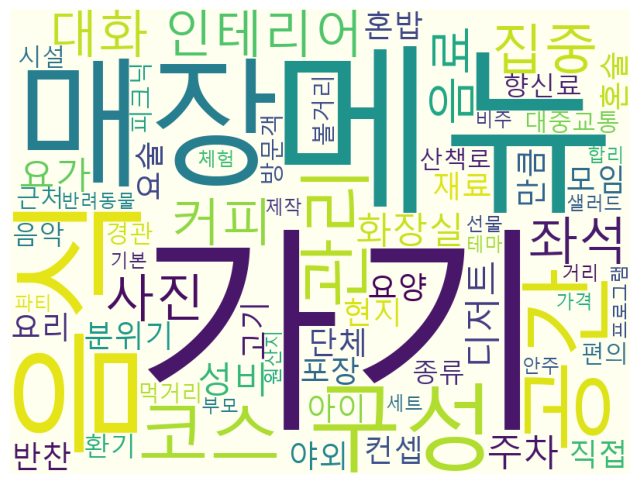

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = '/content/drive/MyDrive/data/ML_BIG_data/malgun.ttf'


# local pc (경로 설정)

# wc = WordCloud(font_path,background_color='ivory', width=800, height=600)
wc = WordCloud(font_path = font_path,background_color='ivory', width=800, height=600)
# wc = WordCloud(background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)

plt.rc("font", family='NanumBarunGothic')
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
# mecab()
from konlpy.tag import Mecab
# 형태소 분류기 Okt() 활용, 명사 추출
# mecab = Mecab()
nlp = Mecab()
message_n =nlp.nouns(message)

word_count = dict()

for tag, counts in count_n.most_common(80):
    if (len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d"%(tag, counts))

가기 : 3
메뉴 : 2
매장 : 2
음식 : 2
구성 : 2
공간 : 2
코스 : 2
관리 : 2
집중 : 1
인테리어 : 1
커피 : 1
좌석 : 1
사진 : 1
대화 : 1
음료 : 1
화장실 : 1
디저트 : 1
요가 : 1
성비 : 1
주차 : 1
분위기 : 1
재료 : 1
단체 : 1
모임 : 1
요양 : 1
야외 : 1
혼밥 : 1
반찬 : 1
컨셉 : 1
요리 : 1
직접 : 1
고기 : 1
현지 : 1
아이 : 1
포장 : 1
요술 : 1
혼술 : 1
만큼 : 1
향신료 : 1
음악 : 1
종류 : 1
환기 : 1
대중교통 : 1
산책로 : 1
경관 : 1
볼거리 : 1
근처 : 1
방문객 : 1
피크닉 : 1
편의 : 1
시설 : 1
먹거리 : 1
반려동물 : 1
샐러드 : 1
선물 : 1
기본 : 1
안주 : 1
세트 : 1
가격 : 1
합리 : 1
비주 : 1
파티 : 1
제작 : 1
거리 : 1
테마 : 1
부모 : 1
체험 : 1
프로그램 : 1
원산지 : 1
